In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import datetime as datetime
from sklearn.decomposition import PCA

In [2]:
def reading_csv(filename, sep):
    """
    Function to read the dataset
    """
    #Using GNU/Linux CLI "$cat -A filename | head -n5" we denote that filename is separate by /t:
    df = pd.read_csv(filename, sep = sep)

    #Standarizing time:
    df['FECHA'] = pd.to_datetime(df['FECHA'], format = '%Y-%m-%d')
    df['HORA'] = pd.to_datetime(df['HORA'], format = '%H:%M:%S')

    hora = [''] * df['HORA'].size

    for ind in df.index:
        x = df['HORA'][ind]
        hora[ind] = x.strftime('%H')

    df['HORA'] = hora
    columnas = {'KVA_Tot' : 'S_k',
                'kVAr_Tot': 'Q_k',
                'kW_Tot'  : 'P_k',
                'I_A'     : 'Ia',
                'I_B'     : 'Ib',
                'I_C'     : 'Ic',
                'V_A_B'   : 'Vab',
                'V_B_C'   : 'Vbc',
                'V_C_A'   : 'Vca'}
    
    df = df.rename(columns = columnas)

    return df



In [3]:
def hourly_table( df, column):

    """
    Function to make hourly consumption tables agroup
    """
    dd = df.groupby(['FECHA','HORA'])[[column]].mean().unstack()
    dd.replace([np.inf, -np.inf], np.nan, inplace=True)
    dd = dd.dropna()
    return dd

In [4]:
df = reading_csv('data-03.csv', '\t')
df.head()

,FECHA,HORA,Ia,Ib,Ic,S_k,Q_k,P_k,Vab,Vbc,Vca
0,2016-10-05,11,109.287041,110.147362,110.887047,2103.854248,277.951416,2085.457520,11013.016602,11043.222656,11054.016602
1,2016-10-05,12,111.300003,111.064903,113.138161,2197.022217,328.640533,2172.846680,11079.030273,11115.412109,11123.236328
2,2016-10-05,13,105.136642,105.236641,107.071754,2051.411865,302.450409,2028.595215,11192.564453,11220.931641,11235.480469
3,2016-10-05,14,99.702164,100.220459,100.730118,1954.322754,312.440918,1929.322754,11219.440430,11249.860352,11258.581055
4,2016-10-05,15,106.306900,103.913803,105.711502,2033.672485,305.138031,2011.672485,11178.465820,11216.954102,11220.976562


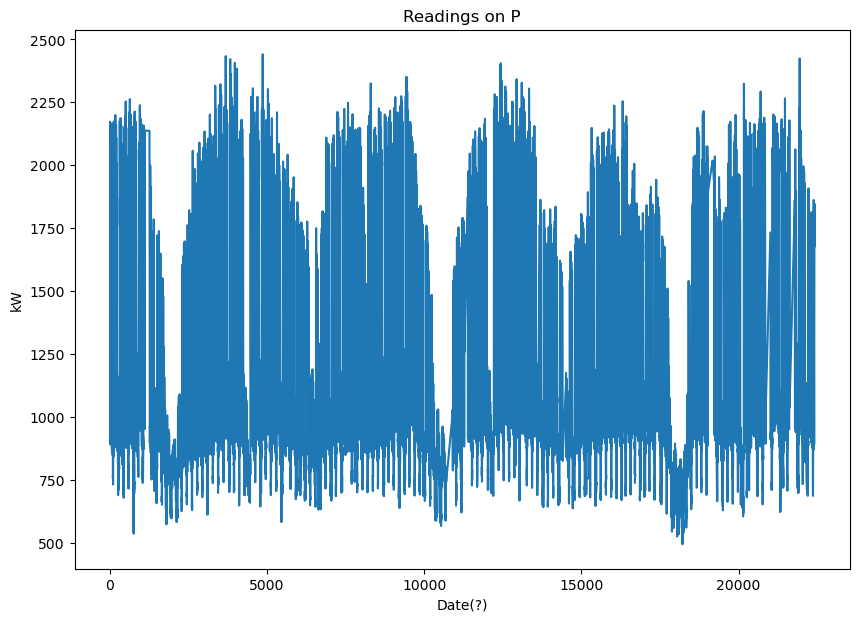

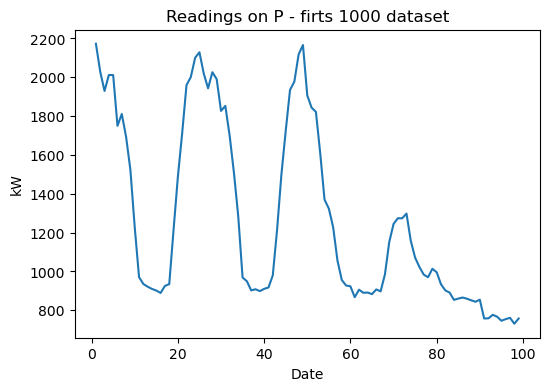

In [5]:
plt.figure(figsize = (10, 7))
plt.plot(df['P_k'])
plt.title("Readings on P")
plt.ylabel('kW'); plt.xlabel('Date(?)')
plt.show()

plt.figure(figsize = (6, 4))
plt.plot(df['P_k'][1:100])
plt.title("Readings on P - firts 1000 dataset")
plt.ylabel('kW'); plt.xlabel('Date')
plt.show()


In [6]:
dd = hourly_table(df, 'P_k')
dd.head(3)

P_k                                                  \
HORA                00          01          02          03          04   
FECHA                                                                    
2016-10-06  921.172729  909.789795  901.455444  889.117310  925.272522   
2016-10-07  902.199280  908.160095  898.439270  910.196350  917.097778   
2016-10-08  867.254333  905.887878  889.964294  891.111023  882.920410   

                                                                            \
HORA                05           06           07           08           09   
FECHA                                                                        
2016-10-06  934.404297  1213.686035  1487.140259  1712.778320  1959.408936   
2016-10-07  979.000000  1215.036011  1498.279053  1723.501953  1934.739258   
2016-10-08  907.237183   897.225891   984.428711  1150.927979  1244.569702   

            ...                                                      \
HORA        ...           14           15           16           17   
FECHA       ...                                                       
2016-10-06  ...  1943.210083  2026.000000  1990.385986  1826.824951   
2016-10-07  ...  1843.640991  1821.871216  1608.905273  1369.766113   
2016-10-08  ...  1070.857788  1022.644958   983.592285   970.075317   

                                                                            \
HORA                 18           19           20           21          22   
FECHA                                                                        
2016-10-06  1852.635254  1700.056885  1507.968750  1282.507446  968.780823   
2016-10-07  1323.667603  1227.344482  1055.621338   955.851868  927.400879   
2016-10-08  1013.555237   995.684875   933.690186   902.209167  890.819153   

                        
HORA                23  
FECHA                   
2016-10-06  949.237732  
2016-10-07  923.299011  
2016-10-08  853.493896  

[3 rows x 24 columns]

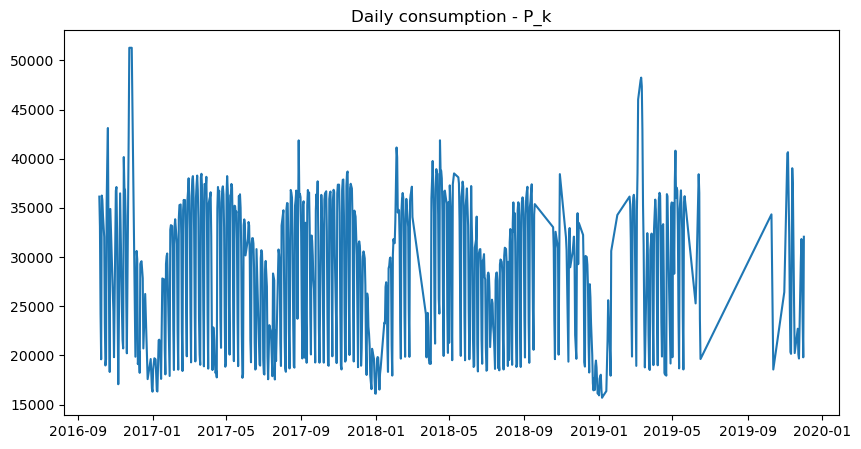

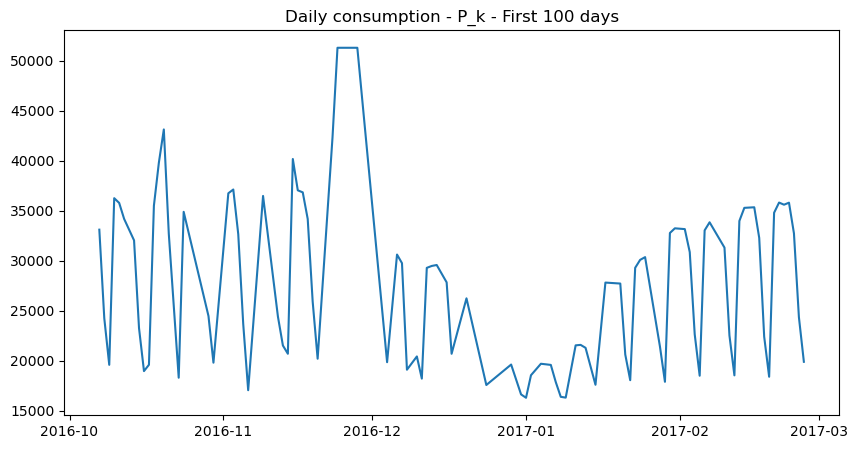

In [7]:
plt.figure(figsize = (10, 5))
plt.title('Daily consumption - P_k')
plt.plot(dd.sum(axis = 1))
plt.show()


plt.figure(figsize = (10, 5))
plt.title('Daily consumption - P_k - First 100 days')
plt.plot(dd[1:100].sum(axis = 1))
plt.show()

          

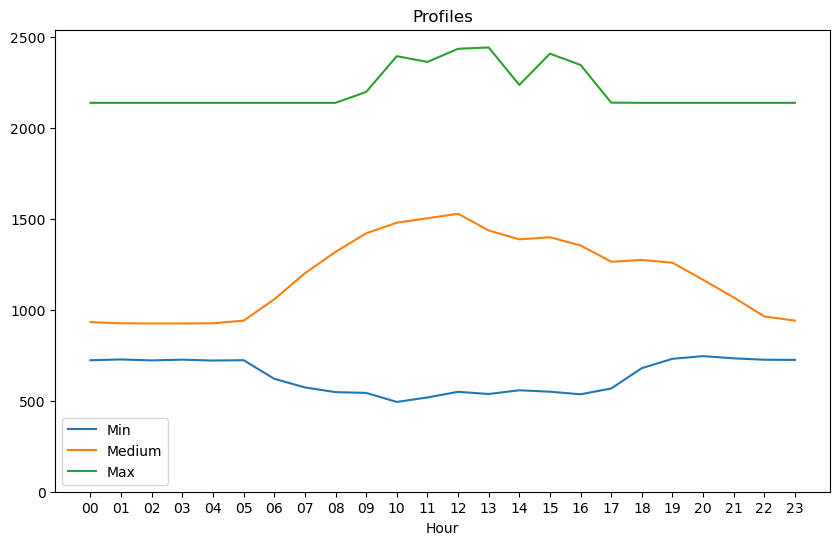

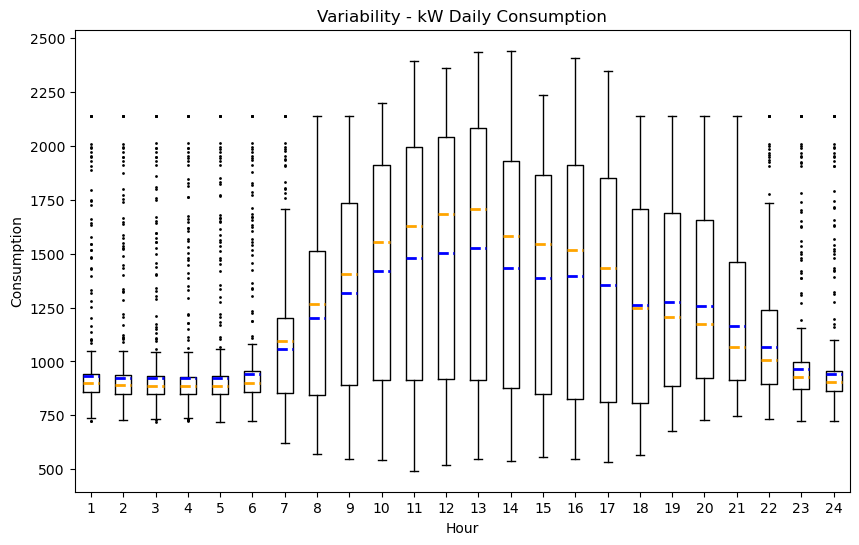

In [8]:
plt.figure(figsize= (10,6))
plt.plot(dd['P_k'].min(axis=0), label='Min')
plt.plot(dd['P_k'].mean(axis=0), label='Medium')
plt.plot(dd['P_k'].max(axis=0), label='Max')
plt.xlabel('Hour')
plt.title('Consumption')
plt.ylim(bottom=0)
plt.title('Profiles')
plt.legend()
plt.show()

plt.figure(figsize=(10,6))
flierprops = dict(marker= 'o', markerfacecolor= 'black', markersize=2, markeredgecolor='none')
medianprops = dict(linestyle='--', linewidth=2, color='orange')
meanprops = dict(linestyle='--', linewidth=2, color='blue')

plt.boxplot(dd['P_k'], flierprops = flierprops, showmeans=True, meanprops = meanprops, meanline = True, medianprops = medianprops)
plt.xlabel('Hour')
plt.ylabel('Consumption')
plt.title('Variability - kW Daily Consumption') 
plt.show()


In [9]:
#Normalization through min-max rescaling. 


def normMatrix(dd):
    """
    Normalization of the dataset via matrix method.
    """
    minMx = min(dd.min()); maxMx = max(dd.max())

    ddN = (dd-minMx) / (maxMx - minMx)

    return ddN


def normColumns(dd):
    """
    Normalization of the dataset by columns method.
    """
    
    ddN = (dd-dd.min())/(dd.max() - dd.min())
    
    return ddN


def normRows(dd):
    """
    Normalization of the dataset by columns rows. Mean normalization as well.
    """

    cols = dd.columns
    ddN = dd.copy()

    average = ddN.mean(axis = 1)

    for col in cols:
        ddN[col] = ddN[col] /  average

    onesMx = np.ones(shape=ddN.min().shape)

    minVal = min(ddN.min())
    maxVal = max(ddN.max())
    ddN = (ddN - minVal) / (maxVal - minVal)

    return ddN




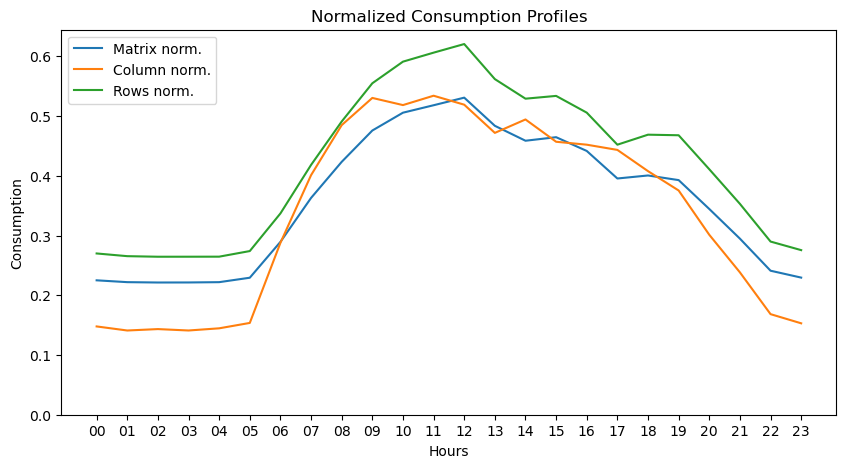

In [10]:



#Standardized datasets:
dd_normMx = normMatrix(dd['P_k'])
dd_normColumns = normColumns(dd['P_k'])
dd_normRows = normRows(dd['P_k'])

plt.figure(figsize=(10,5))
plt.plot(dd_normMx.mean(axis=0), label='Matrix norm.')
plt.plot(dd_normColumns.mean(axis=0), label='Column norm.')
plt.plot(dd_normRows.mean(axis=0), label='Rows norm.')
plt.xlabel('Hours')
plt.ylabel('Consumption')
plt.ylim(bottom=0)
plt.title('Normalized Consumption Profiles')
plt.legend(loc= 'upper left')
plt.show()

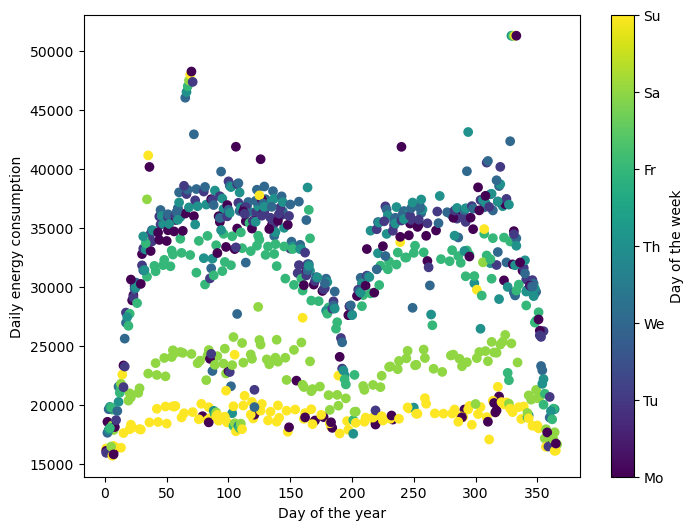

In [38]:
#Hours per day
hours = [ hour for hour in list(dd['P_k'].axes[1]) ]

#Day of the Week
DOW = []

#Day of the Year
DOY = []

#Recorded Dates
RD = dd.index.date

for i in range(0, len(RD)):
    DOW.append(RD[i].isoweekday())
    DOY.append(RD[i].timetuple().tm_yday)

dailyP = dd['P_k'][hours].sum(axis=1)
plt.figure(figsize=(8,6))
plt.scatter(DOY, dailyP, c=DOW, cmap=cm.viridis)
cbar = plt.colorbar(label='Day of the week')
cbar.ax.set_yticks([1, 2, 3, 4, 5, 6, 7])
cbar.ax.set_yticklabels(['Mo', 'Tu', 'We', 'Th', 'Fr', 'Sa', 'Su'])
plt.xlabel("Day of the year")
plt.ylabel("Daily energy consumption")
plt.show()

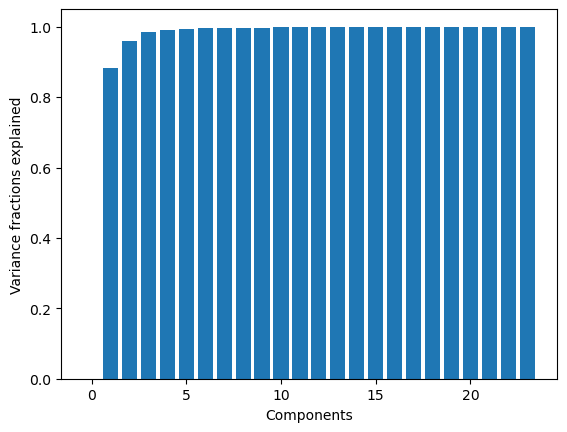

In [34]:
x = []
y = []

for hour in hours:

    pca = PCA(n_components=int(hour))
    principalComponents = pca.fit_transform(dd['P_k'][hours].values)
    x.append(np.sum(pca.explained_variance_ratio_))
    y.append(int(hour))

plt.bar(y,x)
plt.xlabel('Components')
plt.ylabel('Variance fractions explained')
plt.show()

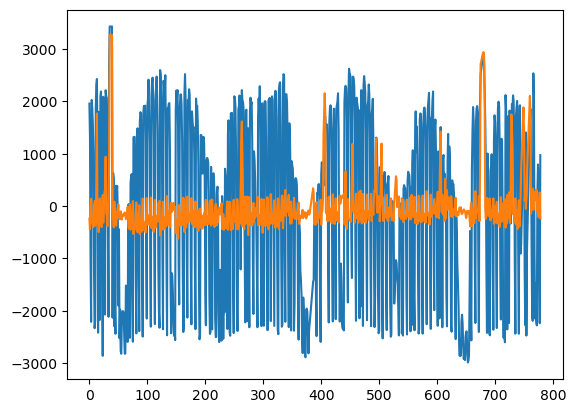

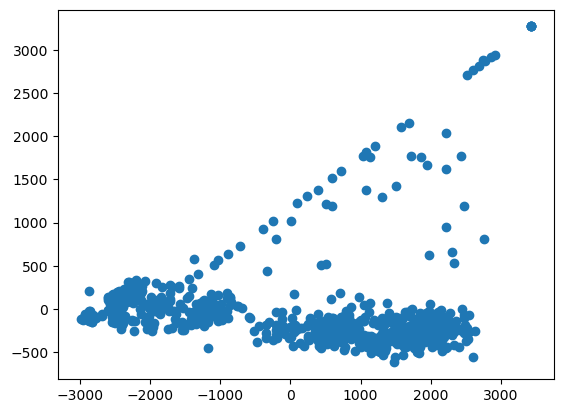

In [35]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(dd['P_k'][hours].values)
plt.plot(principalComponents)
plt.show()

plt.scatter(principalComponents.transpose()[0], principalComponents.transpose()[1])
plt.show()